<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

In Lab 4.1.1 we were able to predict house price via a predictor variable from first principles. Here we the see how the same can be done using scikit-learn.

For comparison purposes, we will continue with the same predictor `sq__ft` in our dataset as last time.

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [100]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Read in the data

In [101]:
# Read CSV
path = r'C:\Users\Vinitha\Desktop\IOD\DATA\Sacramento_transactions.csv'
#house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(path)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [102]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [103]:
data[['price', 'sq__ft', 'beds']].describe()

,price,sq__ft,beds
count,985.000000,985.000000,985.000000
mean,234144.263959,1314.916751,2.911675
std,138365.839085,853.048243,1.307932
min,1551.000000,0.000000,0.000000
25%,145000.000000,952.000000,2.000000
50%,213750.000000,1304.000000,3.000000
75%,300000.000000,1718.000000,4.000000
max,884790.000000,5822.000000,8.000000


In [104]:
!pip install scikit-learn

# import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

In [105]:
data[['price', 'sq__ft', 'beds']].describe()

,price,sq__ft,beds
count,985.000000,985.000000,985.000000
mean,234144.263959,1314.916751,2.911675
std,138365.839085,853.048243,1.307932
min,1551.000000,0.000000,0.000000
25%,145000.000000,952.000000,2.000000
50%,213750.000000,1304.000000,3.000000
75%,300000.000000,1718.000000,4.000000
max,884790.000000,5822.000000,8.000000


<Axes: >

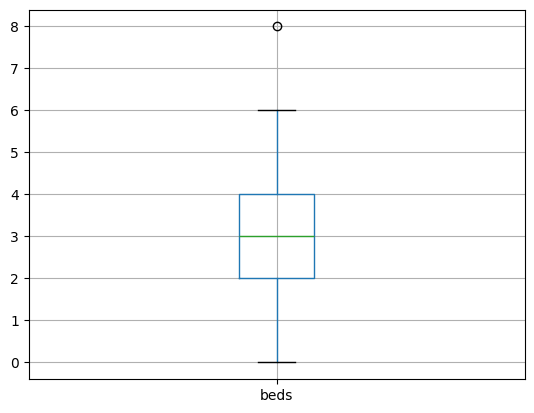

In [106]:
data['beds'].quantile(0.25)
data.boxplot('beds')

In [107]:
Q1 = data[['price', 'sq__ft', 'beds']].quantile(0.25)
Q3 = data[['price', 'sq__ft', 'beds']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out the outliers
data_no_outliers = data[(data[['price', 'sq__ft', 'beds']] >= lower_bound) & (data[['price', 'sq__ft', 'beds']] <= upper_bound)]

In [108]:
print(f'The stats with outliers: \n {data[['price', 'sq__ft', 'beds']].describe()}')
print(f'\n The stats without outliers: \n {data_no_outliers[['price', 'sq__ft', 'beds']].describe()}')

The stats with outliers: 
                price       sq__ft        beds
count     985.000000   985.000000  985.000000
mean   234144.263959  1314.916751    2.911675
std    138365.839085   853.048243    1.307932
min      1551.000000     0.000000    0.000000
25%    145000.000000   952.000000    2.000000
50%    213750.000000  1304.000000    3.000000
75%    300000.000000  1718.000000    4.000000
max    884790.000000  5822.000000    8.000000

 The stats without outliers: 
                price       sq__ft        beds
count     948.000000   939.000000  984.000000
mean   218311.825949  1208.656017    2.906504
std    113513.702472   712.819582    1.298484
min      1551.000000     0.000000    0.000000
25%    140000.000000   914.500000    2.000000
50%    208000.000000  1269.000000    3.000000
75%    289000.000000  1638.000000    4.000000
max    528000.000000  2846.000000    6.000000


In [109]:
data['city'].value_counts()
data['city'].value_counts()
data['city'].value_counts()

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: count, dtype: int64

In [113]:
X = np.array([[1], [2], [3], [4], [5]])  # Example feature 'beds'
y = np.array([100, 150, 200, 250, 300])  # Example target 'price'

# Create LinearRegression object
linreg = LinearRegression()

# Fit the model
linreg.fit(X, y)

LinearRegression()

### 2. Predict Price

We are going to predict the target variable `price` from `sq__ft` using sklearn's linear_model.

Read up on the following methods and attributes here: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- coef_
- intercept_
- fit()
- predict()
- score()

In [70]:
!pip install scikit-learn

# import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

#### 2.1 Create an instance of LinearRegression.

In [79]:
# Identify outliers using the IQR method
Q1 = data[['price', 'sq__ft', 'beds']].quantile(0.25)
Q3 = data[['price', 'sq__ft', 'beds']].quantile(0.75)

In [99]:
# ANSWER
X =
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_)

#### 2.2 Fit predictor and target variables using linear regression

In [117]:
X = data['sq__ft'].values.reshape(-1,1)
y = data['price']

In [118]:
# ANSWER


#### 2.3. Using attributes of the LinearRegression() class find coefficient and intercept.

In [119]:
# ANSWER

from sklearn.linear_model import LinearRegression  
linreg = LinearRegression() 
print(linreg)

LinearRegression()


In [120]:
X = data['sq__ft'].values.reshape(-1,1)
y = data['price']
linreg = LinearRegression()

# Fit the model
linreg.fit(X, y)

# Print coefficients and intercept
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Coefficients: [54.15863969]
Intercept: 162930.16140699777


#### 2.4 Find R^2 Score

Find $R^2$ Using the ```score``` method of LinearRegression.

In [121]:
# ANSWER
linreg.score(X, y)

0.11148717682951437

### 3. Splitting Data


Splitting the data into training and test sets is important in supervised learning.

- We ensure that the test set remains untouched during the model training process. This isolation prevents any information leakage about the test set into the training process.

- It allows us to evaluate the performance of our machine learning model on unseen data.


In [124]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Use the `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [142]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
## Create training and testing subsets
train = linreg.fit(X_train, y_train)

print("Coefficients:", train.coef_)
print("Intercept:", train.intercept_)

Coefficients: [47.43508406]
Intercept: 166482.3414496886


In [146]:
print("First 5 Predicted values:", y_pred[:5])

First 5 Predicted values: [209458.52761247 279472.71169224 259549.97638499 248971.95263852
 238915.71481676]


#### 3.2 Check Shape, Sample of Test Train Data

In [147]:
# ANSWER  .values.reshape(-1,1 X = data['sq__ft'].values.reshape(-1,1)
# Make predictions on the testing set
y_pred = linreg.predict(X_test)
test = data['sq__ft'].values.reshape(-1,1)
# Print predictions and actual values
print("First 5 Predicted values:", y_pred[:5])
print("Actual values:", y_test)
# Evaluate the model using the score method
score = linreg.score(X_test, y_test)
print("R^2 Score (model performance):", score)
## Check training/test data

First 5 Predicted values: [209458.52761247 279472.71169224 259549.97638499 248971.95263852
 238915.71481676]
Actual values: 613     77000
451    236000
731    240971
436    221000
275    293993
        ...  
697    205000
797    325000
328    572500
525    408431
971    224000
Name: price, Length: 326, dtype: int64
R^2 Score (model performance): 0.13602012247180006


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [ ]:
# ANSWER
linereg.fit

In [ ]:
# ANSWER
score = linreg.score(X_test, y_test)

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using the linear regression model.**

In [150]:
# ANSWER



print(data[data['sq__ft'] == '1204'])

Empty DataFrame
Columns: [street, city, zip, state, beds, baths, sq__ft, type, sale_date, price, latitude, longitude]
Index: []


#### Find the error

In [ ]:
# Predict price from X_test

### Conclusion
We have seen that through scikit-learn, minimal code is needed to implement and evaluate a linear regression model.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



